In [1]:
#Import dependencies
import pandas as pd
import matplotlib as plt
import os
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy import stats as st


In [2]:
cleaned_df = pd.read_csv("cleaned_data_js_sc.csv", encoding = "ISO-8859-1")

In [3]:
cleaned_df.head()

,S. No.,Timestamp,GADE,Game,Platform,Hours,earnings,whyplay,League,streams,...,Degree,Birthplace,Residence,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,Both Singleplayer and Multiplayer,Skyrim,"Console (PS, Xbox, ...)",15,I play for fun,having fun,NaN,0,...,Bachelor (or equivalent),USA,USA,Singleplayer,Accept,1,23,5,USA,USA
1,2,42052.00680,Somewhat difficult,Other,PC,8,I play for fun,having fun,NaN,2,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,8,16,33,USA,USA
2,3,42052.03860,Both Singleplayer and Multiplayer,Other,PC,0,I play for fun,having fun,NaN,0,...,Bachelor (or equivalent),Germany,Germany,Singleplayer,Accept,8,17,31,DEU,DEU
3,4,42052.06804,Both Singleplayer and Multiplayer,Other,PC,20,I play for fun,improving,NaN,5,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,0,17,11,USA,USA
4,5,42052.08948,Very difficult,Other,"Console (PS, Xbox, ...)",20,I play for fun,having fun,NaN,1,...,High school diploma (or equivalent),USA,South Korea,Multiplayer,Accept,14,14,13,KOR,USA


In [4]:
cleaned_df.columns

Index(['S. No.', 'Timestamp', 'GADE', 'Game', 'Platform', 'Hours', 'earnings',
       'whyplay', 'League', 'streams', 'Narcissism', 'Gender', 'Age', 'Work',
       'Degree', 'Birthplace', 'Residence', 'Playstyle', 'accept', 'GAD_T',
       'SWL_T', 'SPIN_T', 'Residence_ISO3', 'Birthplace_ISO3'],
      dtype='object')

In [5]:
cleaned_df['Hours']

0        15
1         8
2         0
3        20
4        20
         ..
11677    40
11678    20
11679    20
11680     5
11681    15
Name: Hours, Length: 11682, dtype: int64

In [6]:
cleaned_df['GAD_T'].max()

21

# 1. Is there a correlation between mental health disorders and amount of time spent gaming?

(a) GAD, SWL and SPIN vs. Hours playing


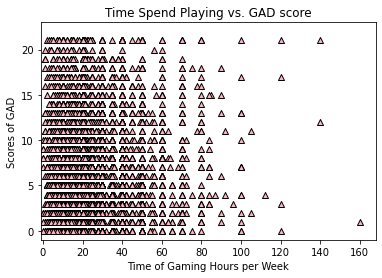

In [7]:
# Prepare the scatter plot for GAD vs. Hours to check for any corralations
x_value = cleaned_df['Hours']
y_value = cleaned_df['GAD_T']
plt.scatter(x_value, y_value, marker = '^', color = 'lightpink', edgecolors="black")
plt.xlim(-1,168)
plt.ylim(-1,23)
plt.title("Time Spend Playing vs. GAD score")
plt.xlabel("Time of Gaming Hours per Week")
plt.ylabel("Scores of GAD")
plt.savefig('GAD_scatter.pdf')


In [ ]:
group0 = cleaned_df[cleaned_df["whyplay"] == ]["resting_heart_rate"]
group1 = df[df["num_workouts"] == 1]["resting_heart_rate"]
group2 = df[df["num_workouts"] == 2]["resting_heart_rate"]
group3 = df[df["num_workouts"] == 3]["resting_heart_rate"]
group4 = df[df["num_workouts"] == 4]["resting_heart_rate"]

In [8]:
# GAD_T
# SWL_T
# SPIN_T
# Narcissism
# gender
# age
# Work
# whyplay
# playstyle
# earnings
# League
# Game
# Platform
# streams
# Residence

The correlation between weekly playing time and the score of GAD is ~ 0.01
The r-squared value is 0.00014685476691751308
There is no correlation between reported time spent playing games and score of GAD


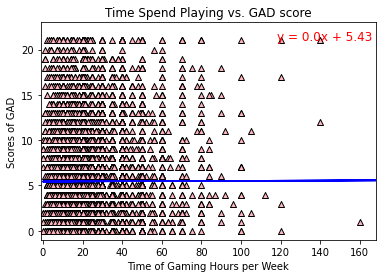

In [79]:
corr_coeff = st.pearsonr(x_value, y_value)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
reg_line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value, marker="^", color = "lightpink", edgecolors = "black")
plt.plot(x_value, regress_values,"b")
plt.annotate(reg_line_equation,(118,21),fontsize = 12,color = "red")
plt.xlim(-1,168)
plt.ylim(-1,23)
plt.xlabel("Time of Gaming Hours per Week")
plt.ylabel("Scores of GAD")
plt.title("Time Spend Playing vs. GAD score")
plt.savefig('GAD_scatter_reg.png')

print(f'The correlation between weekly playing time and the score of GAD is ~ {round(corr_coeff[0],2)}')
print(f'The r-squared value is {rvalue**2}')
print(f'There is no correlation between reported time spent playing games and score of GAD')

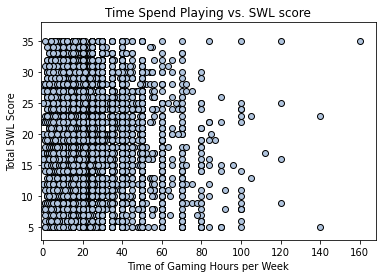

In [71]:
# Prepare the scatter plot for SWL vs. Hours to check for any corralations
x_value1 = cleaned_df['Hours']
y_value1 = cleaned_df['SWL_T']
plt.scatter(x_value1, y_value1, marker = 'o', color = 'lightsteelblue', edgecolors="black")
plt.xlim(-1,168)
plt.ylim(3,38)
plt.xlabel("Time of Gaming Hours per Week")
plt.ylabel("Total SWL Score")
plt.title("Time Spend Playing vs. SWL score")
plt.savefig('SWL_scatter.png')

The correlation between weekly playing time and the score of SWL is ~ -0.03
The r-squared value is 0.001189051761866939
There is no correlation between reported time spent playing games and score of SWL


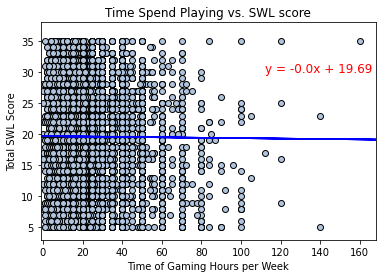

In [101]:
corr_coeff = st.pearsonr(x_value1, y_value1)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value1, y_value1)
regress_values = x_value1 * slope + intercept
reg_line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value1, y_value1, marker="o", color = "lightsteelblue", edgecolors = "black")
plt.plot(x_value1, regress_values,"b")
plt.annotate(reg_line_equation,(112,30),fontsize = 12,color = "red")
plt.xlim(-1,168)
plt.ylim(3,38)
plt.xlabel("Time of Gaming Hours per Week")
plt.ylabel("Total SWL Score")
plt.title("Time Spend Playing vs. SWL score")

print(f'The correlation between weekly playing time and the score of SWL is ~ {round(corr_coeff[0],2)}')
print(f'The r-squared value is {rvalue**2}')
print(f'There is no correlation between reported time spent playing games and score of SWL')
plt.savefig('SWL_scatter_reg.png')

Text(0.5, 1.0, 'Time Spend Playing vs. SPIN score')

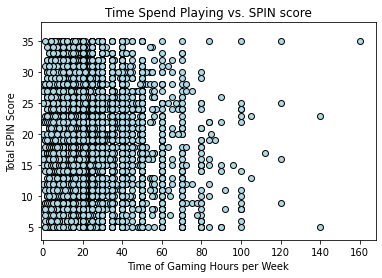

In [12]:
# Prepare the scatter plot for SPIN vs. Hours to check for any corralations
x_value2 = cleaned_df['Hours']
y_value2 = cleaned_df['SPIN_T']
plt.scatter(x_value1, y_value1, marker = 'o', color = 'lightblue', edgecolors="black")
plt.xlim(-1,168)
plt.ylim(3,38)
plt.xlabel("Time of Gaming Hours per Week")
plt.ylabel("Total SPIN Score")
plt.title("Time Spend Playing vs. SPIN score")


The correlation between weekly playing time and the score of SPIN is ~ -0.03
The r-squared value is 0.002416060891967237
There is no correlation between reported time spent playing games and score of SPIN


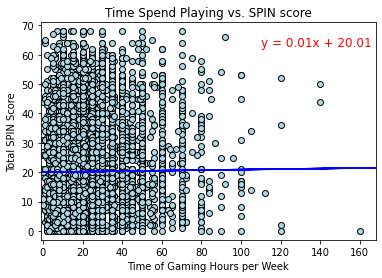

In [102]:
orr_coeff = st.pearsonr(x_value2, y_value2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value2, y_value2)
regress_values = x_value2 * slope + intercept
reg_line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value2, y_value2, marker="o", color = 'lightblue', edgecolors = "black")
plt.plot(x_value2, regress_values,"b")
plt.annotate(reg_line_equation,(110,63),fontsize = 12,color = "red")
plt.xlim(-1,168)
plt.ylim(-3,71)
plt.xlabel("Time of Gaming Hours per Week")
plt.ylabel("Total SPIN Score")
plt.title("Time Spend Playing vs. SPIN score")

print(f'The correlation between weekly playing time and the score of SPIN is ~ {round(corr_coeff[0],2)}')
print(f'The r-squared value is {rvalue**2}')
print(f'There is no correlation between reported time spent playing games and score of SPIN')
plt.savefig('SPIN_scatter_reg.png')

In [14]:
#Make a new DataFrame with all parameters I will use for this part:
Jo_df = cleaned_df[['Hours', 'Game', 'Platform', 'earnings',
       'whyplay', 'streams', 'Narcissism', 'Gender', 'Age', 'Work',
       'Degree', 'Residence', 'Playstyle', 'GAD_T',
       'SWL_T', 'SPIN_T']]
Jo_df.head()

,Hours,Game,Platform,earnings,whyplay,streams,Narcissism,Gender,Age,Work,Degree,Residence,Playstyle,GAD_T,SWL_T,SPIN_T
0,15,Skyrim,"Console (PS, Xbox, ...)",I play for fun,having fun,0,1,Male,25,Unemployed / between jobs,Bachelor (or equivalent),USA,Singleplayer,1,23,5
1,8,Other,PC,I play for fun,having fun,2,1,Male,41,Unemployed / between jobs,Bachelor (or equivalent),USA,Multiplayer,8,16,33
2,0,Other,PC,I play for fun,having fun,0,4,Female,32,Employed,Bachelor (or equivalent),Germany,Singleplayer,8,17,31
3,20,Other,PC,I play for fun,improving,5,2,Male,28,Employed,Bachelor (or equivalent),USA,Multiplayer,0,17,11
4,20,Other,"Console (PS, Xbox, ...)",I play for fun,having fun,1,1,Male,19,Employed,High school diploma (or equivalent),South Korea,Multiplayer,14,14,13


In [15]:
#check if there are any NAs
Jo_df.isna().sum()

Hours         0
Game          0
Platform      0
earnings      0
whyplay       0
streams       0
Narcissism    0
Gender        0
Age           0
Work          0
Degree        0
Residence     0
Playstyle     0
GAD_T         0
SWL_T         0
SPIN_T        0
dtype: int64

In [16]:
#remove report >168 hours /per week
cleaned_hours = Jo_df[Jo_df['Hours']<=168]
cleaned_hours['Hours'].max()

160

In [17]:
def group_hours(hours):
    if hours < 10:
        return "0-10"
    elif hours < 20:
        return "10-20"
    elif hours <40:
        return "20-40"
    elif hours <80:
        return "40-80"
    elif hours <120:
        return "80-120"
    else:
        return "120-168"

In [18]:
cleaned_hours['Hours_group'] = cleaned_hours['Hours'].map(group_hours)

/var/folders/c1/_wjd1nqx03q7043fsjpcgjd80000gn/T/ipykernel_54618/4201906776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_hours['Hours_group'] = cleaned_hours['Hours'].map(group_hours)


In [19]:
cleaned_hours.head()

,Hours,Game,Platform,earnings,whyplay,streams,Narcissism,Gender,Age,Work,Degree,Residence,Playstyle,GAD_T,SWL_T,SPIN_T,Hours_group
0,15,Skyrim,"Console (PS, Xbox, ...)",I play for fun,having fun,0,1,Male,25,Unemployed / between jobs,Bachelor (or equivalent),USA,Singleplayer,1,23,5,10-20
1,8,Other,PC,I play for fun,having fun,2,1,Male,41,Unemployed / between jobs,Bachelor (or equivalent),USA,Multiplayer,8,16,33,0-10
2,0,Other,PC,I play for fun,having fun,0,4,Female,32,Employed,Bachelor (or equivalent),Germany,Singleplayer,8,17,31,0-10
3,20,Other,PC,I play for fun,improving,5,2,Male,28,Employed,Bachelor (or equivalent),USA,Multiplayer,0,17,11,20-40
4,20,Other,"Console (PS, Xbox, ...)",I play for fun,having fun,1,1,Male,19,Employed,High school diploma (or equivalent),South Korea,Multiplayer,14,14,13,20-40


In [20]:
#GAD bins = [0, 10, 20, 40, 80, 120, 168]

numeric_columns = ["GAD_T", "SWL_T", "SPIN_T"]
by_hours_df = cleaned_hours.groupby(['Hours_group']).agg(['count', 'mean', 'sum'])[numeric_columns]
by_hours_df

GAD_T                   SWL_T                   SPIN_T             \
            count       mean    sum count       mean    sum  count       mean   
Hours_group                                                                     
0-10         1436   5.121170   7354  1436  20.358635  29235   1436  18.859331   
10-20        3835   5.102999  19570  3835  20.486050  78564   3835  19.106910   
120-168         7  10.714286     75     7  21.142857    148      7  26.285714   
20-40        5104   5.450235  27818  5104  19.291928  98466   5104  20.650862   
40-80        1227   6.741646   8272  1227  17.655257  21663   1227  23.099430   
80-120         71   7.929577    563    71  15.042254   1068     71  23.915493   

                     
                sum  
Hours_group          
0-10          27082  
10-20         73275  
120-168         184  
20-40        105402  
40-80         28343  
80-120         1698

In [105]:
#ANOVA for GAD
# Extract individual groups
group0 = cleaned_hours[cleaned_hours["Hours_group"] == "0-10"]["GAD_T"]
group1 = cleaned_hours[cleaned_hours["Hours_group"] == "10-20"]["GAD_T"]
group2 = cleaned_hours[cleaned_hours["Hours_group"] == "20-40"]["GAD_T"]
group3 = cleaned_hours[cleaned_hours["Hours_group"] == "40-80"]["GAD_T"]
group4 = cleaned_hours[cleaned_hours["Hours_group"] == "80-120"]["GAD_T"]
group5 = cleaned_hours[cleaned_hours["Hours_group"] == "120-168"]["GAD_T"]

              
st.f_oneway(group0, group1, group2, group3, group4, group5)






F_onewayResult(statistic=30.611026075853225, pvalue=4.816306046661393e-31)

In [107]:
#ANOVA for SWL
# Extract individual groups
group0 = cleaned_hours[cleaned_hours["Hours_group"] == "0-10"]["SWL_T"]
group1 = cleaned_hours[cleaned_hours["Hours_group"] == "10-20"]["SWL_T"]
group2 = cleaned_hours[cleaned_hours["Hours_group"] == "20-40"]["SWL_T"]
group3 = cleaned_hours[cleaned_hours["Hours_group"] == "40-80"]["SWL_T"]
group4 = cleaned_hours[cleaned_hours["Hours_group"] == "80-120"]["SWL_T"]
group5 = cleaned_hours[cleaned_hours["Hours_group"] == "120-168"]["SWL_T"]

              
st.f_oneway(group0, group1, group2, group3, group4, group5)




F_onewayResult(statistic=40.989377887622716, pvalue=5.887196488286692e-42)

In [108]:
#ANOVA for SPIN
# Extract individual groups
group0 = cleaned_hours[cleaned_hours["Hours_group"] == "0-10"]["SPIN_T"]
group1 = cleaned_hours[cleaned_hours["Hours_group"] == "10-20"]["SPIN_T"]
group2 = cleaned_hours[cleaned_hours["Hours_group"] == "20-40"]["SPIN_T"]
group3 = cleaned_hours[cleaned_hours["Hours_group"] == "40-80"]["SPIN_T"]
group4 = cleaned_hours[cleaned_hours["Hours_group"] == "80-120"]["SPIN_T"]
group5 = cleaned_hours[cleaned_hours["Hours_group"] == "120-168"]["SPIN_T"]

              
st.f_oneway(group0, group1, group2, group3, group4, group5)



F_onewayResult(statistic=21.9160424083619, pvalue=6.400978039767038e-22)

In [21]:
by_hours_df.index

Index(['0-10', '10-20', '120-168', '20-40', '40-80', '80-120'], dtype='object', name='Hours_group')

In [22]:
by_hours_df.columns

MultiIndex([( 'GAD_T', 'count'),
            ( 'GAD_T',  'mean'),
            ( 'GAD_T',   'sum'),
            ( 'SWL_T', 'count'),
            ( 'SWL_T',  'mean'),
            ( 'SWL_T',   'sum'),
            ('SPIN_T', 'count'),
            ('SPIN_T',  'mean'),
            ('SPIN_T',   'sum')],
           )

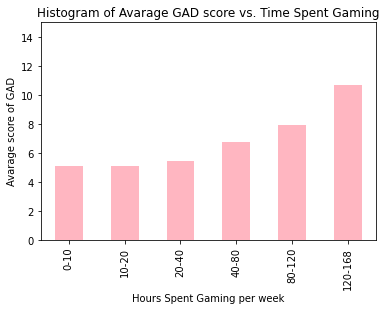

In [74]:
#Histogram for GDP vs. hours played
GAD_hours = ['0-10', '10-20', '20-40', '40-80', '80-120','120-168']
GAD_time_df = cleaned_hours.groupby(['Hours_group']).agg(['mean']).loc[GAD_hours]['GAD_T'].plot(kind = "bar", color = 'lightpink', legend = None)
GAD_time_df.set_ylim(0,15)
GAD_time_df.set_ylabel("Avarage score of GAD")
GAD_time_df.set_xlabel("Hours Spent Gaming per week")
GAD_time_df.set_title("Histogram of Avarage GAD score vs. Time Spent Gaming")
plt.savefig('GAD_bar.png', bbox_inches='tight')
plt.show()


In [24]:
cleaned_hours['Hours_group'].dtype


dtype('O')

In [25]:
group0 = GAD_ANOVA[GAD_ANOVA["Hours_group"] == "0-10"]["mean"]
# group1 = df[df["num_workouts"] == 1]["resting_heart_rate"]
# group2 = df[df["num_workouts"] == 2]["resting_heart_rate"]
# group3 = df[df["num_workouts"] == 3]["resting_heart_rate"]
# group4 = df[df["num_workouts"] == 4]["resting_heart_rate"]

NameError: name 'GAD_ANOVA' is not defined

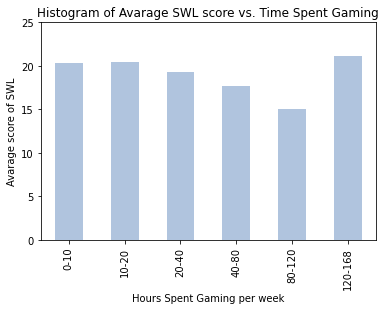

In [75]:
#Histomgram for SWL vs. hours played
SWL_hours = ['0-10', '10-20', '20-40', '40-80', '80-120','120-168']
SWL_time_df = cleaned_hours.groupby(['Hours_group']).agg(['mean']).loc[SWL_hours]['SWL_T'].plot(kind = "bar", legend = None, color ='lightsteelblue')
SWL_time_df.set_ylim(0,25)
SWL_time_df.set_ylabel("Avarage score of SWL")
SWL_time_df.set_xlabel("Hours Spent Gaming per week")
SWL_time_df.set_title("Histogram of Avarage SWL score vs. Time Spent Gaming")
plt.savefig('SWL_bar.png', bbox_inches='tight')
plt.show()


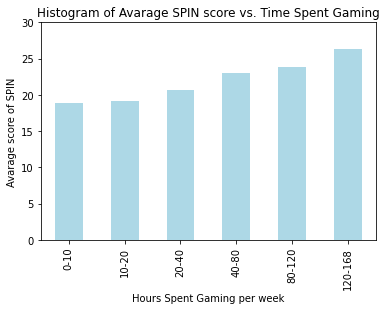

In [76]:
#Histomgram for SPIN vs. hours played
SPIN_hours = ['0-10', '10-20', '20-40', '40-80', '80-120','120-168']
SPIN_time_df = cleaned_hours.groupby(['Hours_group']).agg(['mean']).loc[SPIN_hours]['SPIN_T'].plot(kind = "bar", legend = None, color = 'lightblue')
SPIN_time_df.set_ylim(0,30)
SPIN_time_df.set_ylabel("Avarage score of SPIN")
SPIN_time_df.set_xlabel("Hours Spent Gaming per week")
SPIN_time_df.set_title("Histogram of Avarage SPIN score vs. Time Spent Gaming")
plt.savefig('SPIN_bar.png', bbox_inches='tight')
plt.show()


In [28]:
#double line graph for male and female:
female_df = cleaned_hours.loc[cleaned_hours['Gender']=='Female']
female_df.head()

,Hours,Game,Platform,earnings,whyplay,streams,Narcissism,Gender,Age,Work,Degree,Residence,Playstyle,GAD_T,SWL_T,SPIN_T,Hours_group
2,0,Other,PC,I play for fun,having fun,0,4,Female,32,Employed,Bachelor (or equivalent),Germany,Singleplayer,8,17,31,0-10
7,2,Other,"Console (PS, Xbox, ...)",I play for fun,winning,0,1,Female,23,Employed,Bachelor (or equivalent),USA,Multiplayer,12,12,55,0-10
8,25,World of Warcraft,PC,I play for fun,improving,0,1,Female,27,Employed,High school diploma (or equivalent),Finland,Multiplayer,10,13,26,20-40
9,14,Other,PC,I play for fun,having fun,0,1,Female,21,Student at college / university,High school diploma (or equivalent),USA,Singleplayer,19,27,6,10-20
13,4,Other,"Console (PS, Xbox, ...)",I play for fun,having fun,5,1,Female,24,Unemployed / between jobs,Bachelor (or equivalent),UK,Multiplayer,4,15,36,0-10


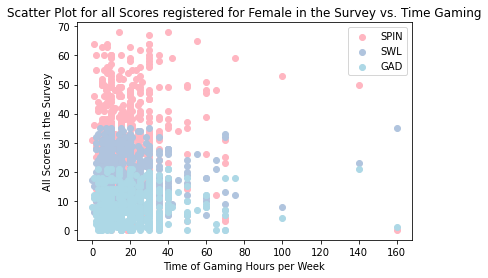

In [29]:
y_axis1 = female_df['GAD_T']
y_axis2 = female_df['SWL_T']
y_axis3 = female_df['SPIN_T']
x_axis = female_df['Hours']

plt.scatter(x_axis, y_axis3, marker = 'o', color = 'lightpink', label ='SPIN')
plt.scatter(x_axis, y_axis2, marker = 'o', color = 'lightsteelblue', label ='SWL')
plt.scatter(x_axis, y_axis1, marker = 'o', color = 'lightblue', label ='GAD')
plt.xlabel("Time of Gaming Hours per Week")
plt.ylabel("All Scores in the Survey")
plt.title("Scatter Plot for all Scores registered for Female in the Survey vs. Time Gaming")
plt.legend(loc = 'best')
plt.show()



In [30]:
avg_female_GAD = female_df['GAD_T'].mean()
avg_female_SWL_T = female_df['SWL_T'].mean()
avg_female_SPIN_T = female_df['SPIN_T'].mean()
avg_female_narcissism = female_df['Narcissism'].mean()

avg_female_GAD
avg_female_SWL_T
avg_female_SPIN_T
avg_female_narcissism


1.8192955589586524

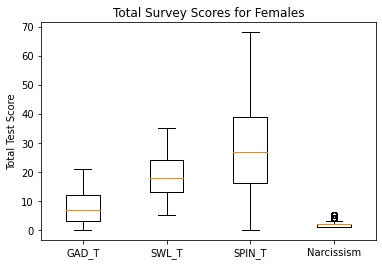

In [77]:
boxplot_data = [female_df['GAD_T'], 
                female_df['SWL_T'], 
                female_df['SPIN_T'], 
                female_df['Narcissism']]

labels = ['GAD_T', 'SWL_T', 'SPIN_T', 'Narcissism']
boxplot_data
fig1, ax1 = plt.subplots()
ax1.set_title("Total Survey Scores for Females")
ax1.set_ylabel("Total Test Score")
ax1.boxplot(boxplot_data, labels = labels, widths = 0.4, vert = True)
plt.savefig('female_box.png')
plt.show()


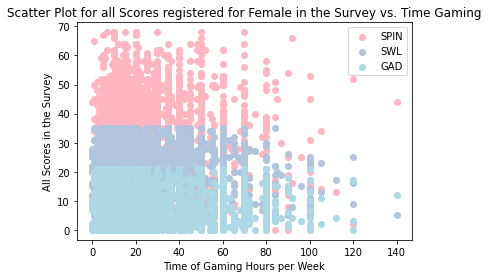

In [32]:
male_df = cleaned_hours.loc[cleaned_hours['Gender']=='Male']
y_axis1 = male_df['GAD_T']
y_axis2 = male_df['SWL_T']
y_axis3 = male_df['SPIN_T']
x_axis  =  male_df['Hours']

plt.scatter(x_axis, y_axis3, marker = 'o', color = 'lightpink', label ='SPIN')
plt.scatter(x_axis, y_axis2, marker = 'o', color = 'lightsteelblue', label ='SWL')
plt.scatter(x_axis, y_axis1, marker = 'o', color = 'lightblue', label ='GAD')
plt.xlabel("Time of Gaming Hours per Week")
plt.ylabel("All Scores in the Survey")
plt.title("Scatter Plot for all Scores registered for Female in the Survey vs. Time Gaming")
plt.legend(loc = 'best')
plt.legend(loc = 'best')
plt.show()

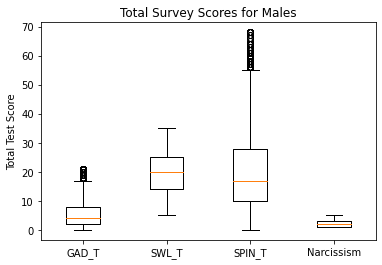

In [78]:
boxplot_data = [male_df['GAD_T'], 
                male_df['SWL_T'], 
                male_df['SPIN_T'], 
                male_df['Narcissism']]

labels = ['GAD_T', 'SWL_T', 'SPIN_T', 'Narcissism']
boxplot_data
fig1, ax1 = plt.subplots()
ax1.set_title("Total Survey Scores for Males")
ax1.set_ylabel("Total Test Score")
ax1.boxplot(boxplot_data, labels = labels, widths = 0.4, vert = True)
plt.savefig('male_box.png')
plt.show()


In [34]:
avg_GAD_female = female_df['GAD_T'].mean() 
avg_GAD_female

#                 female_df['SWL_T'], 
#                 female_df['SPIN_T'], 
#                 female_df['Narcissism']]

7.785604900459418

In [35]:
avg_GAD_male = male_df['GAD_T'].mean() 
avg_GAD_male

5.293517844136926

In [36]:
avr_time_female = female_df["Hours"].mean()
avr_time_female

18.957120980091883

In [37]:
avr_time_male = male_df["Hours"].mean()
avr_time_male

21.646849963583396

In [38]:
stats.ttest_ind(female_df['Hours'], male_df['Hours'], equal_var=False)

Ttest_indResult(statistic=-4.660238212359869, pvalue=3.7608072070784035e-06)

In [39]:
stats.ttest_ind(female_df['GAD_T'], male_df['GAD_T'], equal_var=False)

Ttest_indResult(statistic=11.393656911704012, pvalue=9.98171395983701e-28)

In [40]:
stats.ttest_ind(female_df['SWL_T'], male_df['SWL_T'], equal_var=False)

Ttest_indResult(statistic=-2.5851175095212975, pvalue=0.009928095984623487)

In [70]:
stats.ttest_ind(female_df['SPIN_T'], male_df['SPIN_T'], equal_var=False)

Ttest_indResult(statistic=13.980076201685533, pvalue=2.0828464896966108e-39)

In [41]:
# bins for GAD: 0–4: minimal anxiety 5–9: mild anxiety 10–14: moderate anxiety 15–21: severe anxiety
GAD_df = cleaned_hours[['Hours', 'GAD_T',]]
GAD_df


,Hours,GAD_T
0,15,1
1,8,8
2,0,8
3,20,0
4,20,14
...,...,...
11677,40,4
11678,20,20
11679,20,0
11680,5,13


In [42]:
#add new column to create bins for GAD score
GAD_df["GAD_bin"] = " "
GAD_df

/var/folders/c1/_wjd1nqx03q7043fsjpcgjd80000gn/T/ipykernel_54618/423146905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GAD_df["GAD_bin"] = " "


,Hours,GAD_T,GAD_bin
0,15,1,
1,8,8,
2,0,8,
3,20,0,
4,20,14,
...,...,...,...
11677,40,4,
11678,20,20,
11679,20,0,
11680,5,13,


In [43]:
GAD_df['GAD_bin'] = pd.cut(GAD_df['GAD_T'],
                             bins=[0, 5, 10, 15, 21],
                             labels=['minimal anxiety', 'mild anxiety', 'moderate anxiety',
                                     'severe anxiety'],
                             right=False)
GAD_df

/var/folders/c1/_wjd1nqx03q7043fsjpcgjd80000gn/T/ipykernel_54618/2928788033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GAD_df['GAD_bin'] = pd.cut(GAD_df['GAD_T'],


,Hours,GAD_T,GAD_bin
0,15,1,minimal anxiety
1,8,8,mild anxiety
2,0,8,mild anxiety
3,20,0,minimal anxiety
4,20,14,moderate anxiety
...,...,...,...
11677,40,4,minimal anxiety
11678,20,20,severe anxiety
11679,20,0,minimal anxiety
11680,5,13,moderate anxiety


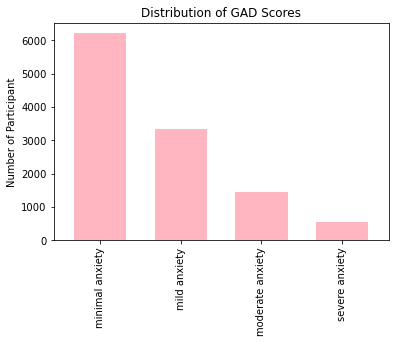

In [61]:
bar_plot_GAD = GAD_df['GAD_bin'].value_counts().plot(kind = "bar",width = 0.65, color = 'lightpink')

bar_plot_GAD.set_ylabel("Number of Participant")
bar_plot_GAD.set_title("Distribution of GAD Scores")
plt.savefig('GAD_bar_bins.pdf', bbox_inches='tight')

plt.show()

In [45]:
# bins of survey results for SWL:
SWL_df = cleaned_hours[['Hours', 'SWL_T',]]
SWL_df['SWL_bin'] = ''
#assing the bins: 31 - 35 Extremely satisfied, 26-30 Satisfied, 21 - 25 Slightly satisfied , 20 Neutral, 15-19 Slightly dissatisfied, 
# 10-14 Dissatisfied, 5-9 Extremely dissatisfied
SWL_df['SWL_bin'] = pd.cut(SWL_df['SWL_T'],
                             bins=[0, 5, 10, 15, 20, 25, 30, 35],
                             labels=['Extremely dissatisfied', 'Dissatisfied', 'Slightly dissatisfied',
                                     'Neutral', 'Slightly satisfied', 'Satisfied', 'Extremely satisfied'],
                             right=False)
SWL_df

/var/folders/c1/_wjd1nqx03q7043fsjpcgjd80000gn/T/ipykernel_54618/3480105809.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SWL_df['SWL_bin'] = ''
/var/folders/c1/_wjd1nqx03q7043fsjpcgjd80000gn/T/ipykernel_54618/3480105809.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SWL_df['SWL_bin'] = pd.cut(SWL_df['SWL_T'],


,Hours,SWL_T,SWL_bin
0,15,23,Slightly satisfied
1,8,16,Neutral
2,0,17,Neutral
3,20,17,Neutral
4,20,14,Slightly dissatisfied
...,...,...,...
11677,40,28,Satisfied
11678,20,23,Slightly satisfied
11679,20,32,Extremely satisfied
11680,5,16,Neutral


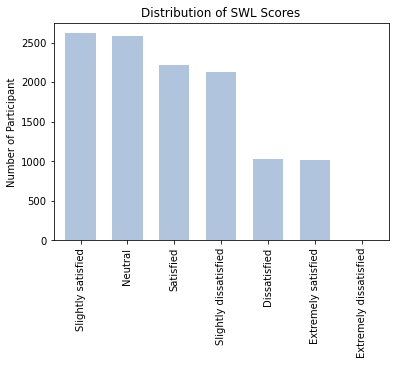

In [59]:
bar_plot_SWL = SWL_df['SWL_bin'].value_counts().plot(kind = "bar",width = 0.65, color = 'lightsteelblue')
bar_plot_SWL.set_ylabel("Number of Participant")
bar_plot_SWL.set_title("Distribution of SWL Scores")
plt.savefig('SWL_bar_bins.pdf', bbox_inches='tight')
plt.show()

In [47]:
# bins of survey results for SWL:
SPIN_df = cleaned_hours[['Hours', 'SPIN_T',]]
SPIN_df['SPIN_bin'] = ''
#SPIN_df['SPIN_T'].max()
# assign the bins for Severity of Social Phobia: <20 None, 21-30 Mild, 31-40 Moderate, 41-50 Severe, >51 Very Severe
SPIN_df['SPIN_bin'] = pd.cut(SPIN_df['SPIN_T'],
                             bins=[0, 20, 30, 40, 50, 68],
                             labels=['None', 'Mild', 'Moderate',
                                     'Severe', 'Very Severe'],
                             right=False)
SPIN_df

/var/folders/c1/_wjd1nqx03q7043fsjpcgjd80000gn/T/ipykernel_54618/1329838052.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SPIN_df['SPIN_bin'] = ''
/var/folders/c1/_wjd1nqx03q7043fsjpcgjd80000gn/T/ipykernel_54618/1329838052.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SPIN_df['SPIN_bin'] = pd.cut(SPIN_df['SPIN_T'],


,Hours,SPIN_T,SPIN_bin
0,15,5,None
1,8,33,Moderate
2,0,31,Moderate
3,20,11,None
4,20,13,None
...,...,...,...
11677,40,7,None
11678,20,25,Mild
11679,20,10,None
11680,5,32,Moderate


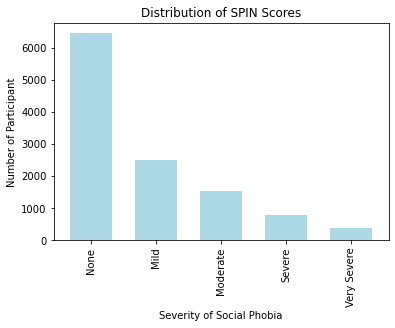

In [62]:
bar_plot_SPIN = SPIN_df['SPIN_bin'].value_counts().plot(kind = "bar",width = 0.65, color = 'lightblue')
bar_plot_SPIN.set_ylabel("Number of Participant")
bar_plot_SPIN.set_xlabel("Severity of Social Phobia")
bar_plot_SPIN.set_title("Distribution of SPIN Scores")
plt.savefig('SPIN_bar_bins.pdf', bbox_inches='tight')
plt.show()

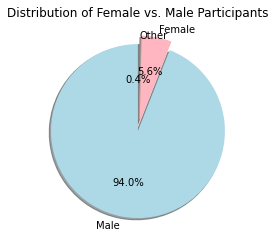

In [109]:
SPIN_pie = cleaned_hours['Gender'].value_counts()
SPIN_pie
explode = (0, 0.1, 0)
plt.pie(SPIN_pie, labels= ('Male', 'Female', 'Other'),explode =explode, colors=("lightblue", "lightpink", "grey"), autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Distribution of Female vs. Male Participants")
plt.savefig('pie_chart_gender.png', bbox_inches='tight')
#don't like this at all will remove this part

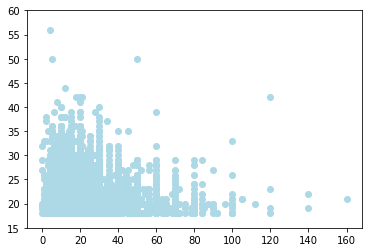

In [50]:
# time spent playing vs. age
cleaned_hours.columns
x_axis = cleaned_hours['Hours']
y_axis = cleaned_hours['Age']


plt.scatter(x_axis, y_axis, marker = 'o', color = 'lightblue', label ='SPIN')
plt.ylim(15,60)
plt.show()


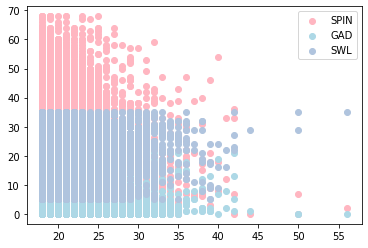

In [51]:
cleaned_hours.columns
y_axis1 = cleaned_hours['GAD_T']
y_axis2 = cleaned_hours['SWL_T']
y_axis3 = cleaned_hours['SPIN_T']
x_axis = cleaned_hours['Age']

plt.scatter(x_axis, y_axis3, marker = 'o', color = 'lightpink', label ='SPIN')
plt.scatter(x_axis, y_axis1, marker = 'o', color = 'lightblue', label ='GAD')
plt.scatter(x_axis, y_axis2, marker = 'o', color = 'lightsteelblue', label ='SWL')
plt.legend(loc = 'best')

plt.show()

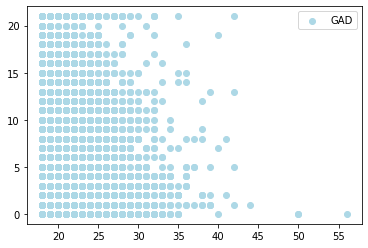

In [52]:
cleaned_hours.columns
y_axis1 = cleaned_hours['GAD_T']
x_axis = cleaned_hours['Age']


plt.scatter(x_axis, y_axis1, marker = 'o', color = 'lightblue', label ='GAD')
plt.legend(loc = 'best')
plt.savefig('ages.pdf')
plt.show()


In [ ]:
#finishing this by seperating
# reg line
# t test and anova